# **CASE STUDY - 2**
# **UNSUPERVISED LEARNING - WHOLESALE CUSTOMER**

# **Dataset Description**

The dataset provided consists of sales and consumption-related information for various product categories across different customers. Each record represents a customer’s purchasing behavior, with details of expenditure across multiple product categories. This dataset is commonly used in unsupervised learning tasks such as customer segmentation, clustering, and market basket analysis to identify hidden patterns and group customers based on their similarities.

---

# Attributes
  1. Channel – Categorical feature indicating the sales channel through which the purchase was made. It represents whether the customer is associated with retail or wholesale distribution.

  2. Region – Categorical feature specifying the geographic region of the customer (e.g., Region 1, Region 2, Region 3).

  3. Fresh – Continuous variable indicating the annual spending on fresh products (e.g., fruits, vegetables, meat).

  4. Milk – Continuous variable indicating the annual spending on milk and dairy products.

  5. Grocery – Continuous variable indicating the annual spending on grocery items.

  6. Frozen – Continuous variable indicating the annual spending on frozen products.

  7. Detergents_Paper – Continuous variable indicating the annual spending on detergents and paper-related products.

  8. Delicassen – Continuous variable indicating the annual spending on delicatessen (specialized foods such as snacks, bakery, premium products).

---

# Nature of the Dataset

  * The dataset contains numerical features and categorical identifiers.
  * No explicit target variable is provided, making it suitable for unsupervised learning techniques such as:
      * Clustering (K-Means, DBSCAN, Hierarchical) to identify customer segments.

      * Dimensionality Reduction (PCA) for visualization and feature extraction.

      * Outlier Detection to identify unusual purchasing patterns.

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
path = '/content/drive/MyDrive/Colab Notebooks/AI_ML_ICT/NOTES/Codes/Data/Wholesale customers data.csv'

# **1. Import All Necessary Libraries**

In [51]:
import pandas as pd               # For data handling and manipulation
import numpy as np                # For numerical operations
import matplotlib.pyplot as plt   # For data visualization
import seaborn as sns             # For advanced data visualization

# **2. Load the Dataset**

In [52]:
# Reading the dataset from the CSV file into a pandas DataFrame
# The CSV file contains wholesale customer data with spending details
# across different product categories and distribution channels
df = pd.read_csv(path)

# Displaying the first 5 rows to get the overview of the dataset
print("First 5 rows of the dataset:")
df.head(5)

First 5 rows of the dataset:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# **3. Data Exploration**

In [53]:
# Check the shape of the dataset( number of rows and columns)
print('Dataset shape (rows, columns):',df.shape)

Dataset shape (rows, columns): (440, 8)


In [54]:
# Get the summary information about the dataset
print('Dataset Information:')
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [55]:
# # Display the basis statistical summary for numerical columns
print('Statistical Summary of Numerical Columns:')
df.describe()

Statistical Summary of Numerical Columns:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# **4. Data Preprocessing**

In [56]:
# Check for missing values in the dataset
print("Missing values per column:")
df.isnull().sum()

Missing values per column:


,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [57]:
# Check for duplicate rows in the dataset
df.duplicated().sum()

np.int64(0)

In [58]:
# Select numerical features for clustering
# Only consider the numerical spending columns: Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen
num_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [59]:
# Keep 'Channel' and 'Region' separately for later interpretation
meta = df[['Channel', 'Region']].copy()

## **4.1 Outlier Detection**

### **4.1.1 Outlier Detection using Boxplot (All Numerical Columns)**

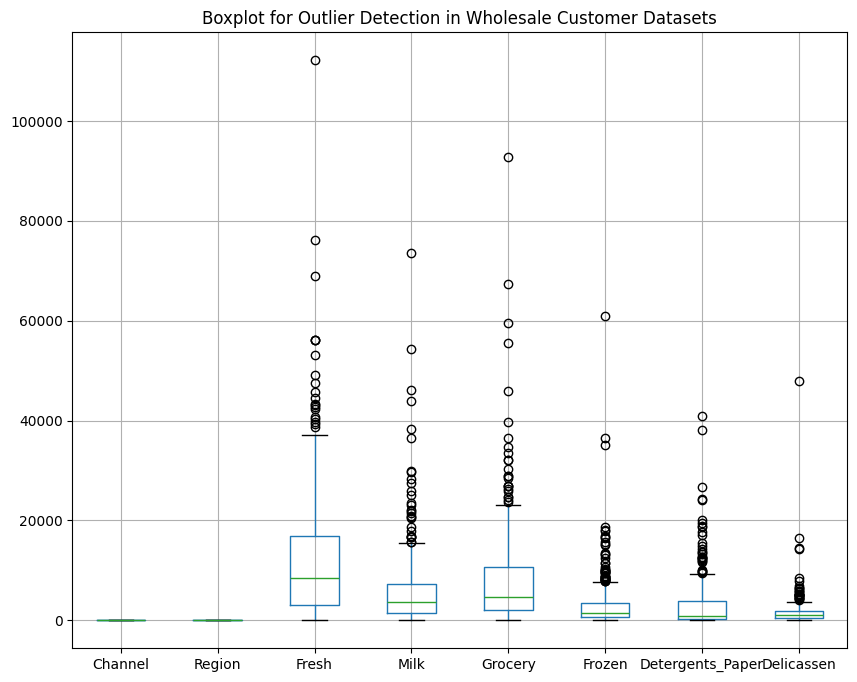

In [60]:
# Drawing boxplot for all numerical columns in the dataset
df.boxplot(figsize=(10, 8))

# Adding a title to clearly specify the purpose of the plot
plt.title('Boxplot for Outlier Detection in Wholesale Customer Datasets')

# Displaying the plot
plt.show()

**Insight:-**

The initial boxplot reveals that most features, particularly Fresh, Milk, Grocery, and Frozen, exhibit extreme skewness with a large number of outliers. Fresh and Grocery show especially high variability, with several values extending far beyond the upper quartile, indicating customers with unusually high purchase volumes in these categories. The presence of so many outliers suggests that the raw dataset is heavily imbalanced and may distort clustering or PCA results. Channel and Region, being categorical variables, show no variability in this representation. Overall, the unscaled and untransformed data indicates a strong need for normalization to reduce the influence of extreme values.

### **4.1.2 Checking Skewness of Numerical Columns in the Wholesale Customer Dataset**

In [61]:
# Calculating the skewness of numerical columns in these dataset
df[num_cols].select_dtypes('number').skew()

,0
Fresh,2.561323
Milk,4.053755
Grocery,3.587429
Frozen,5.907986
Detergents_Paper,3.631851
Delicassen,11.151586


**Insight:**

The dataset exhibits high positive skewness across all numerical spending features, indicating the presence of extreme outliers. To make clustering more robust, a log transformation is applied to reduce skewness, followed by standardization to scale all features to equal variance. This ensures that distance-based clustering algorithms like KMeans and DBSCAN are not dominated by features with extremely large values.

In [62]:
# Apply log transformation to reduce skewness
df[num_cols] = np.log1p(df[num_cols])

In [63]:
# Check skewness after log transformation
print("\nSkewness after log transformation:")
print(pd.DataFrame(df, columns=num_cols).skew())


Skewness after log transformation:
Fresh              -1.575326
Milk               -0.224063
Grocery            -0.674938
Frozen             -0.352655
Detergents_Paper   -0.235961
Delicassen         -1.091827
dtype: float64


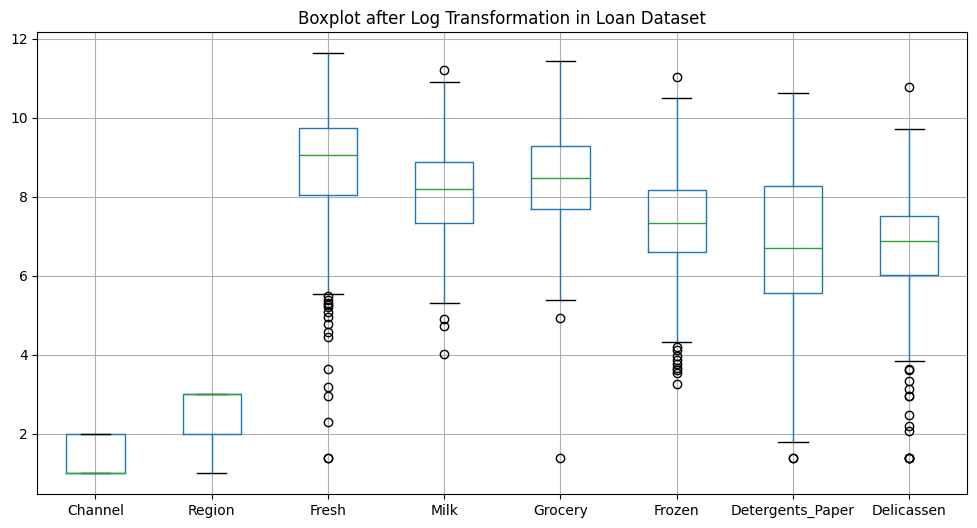

In [64]:
# Drawing boxplot for all numerical columns in the dataset
df.boxplot(figsize=(12,6))

# Adding a title to clearly specify the purpose of the plot
plt.title("Boxplot after Log Transformation in Loan Dataset")

# Displaying the boxplot
plt.show()

**Insight:-**

The log-transformed boxplot demonstrates a significant improvement in the distribution of values across all features. The extreme skewness observed earlier is greatly reduced, and most variables now show more symmetric distributions with fewer pronounced outliers. Fresh, Milk, and Grocery, while still exhibiting some outliers, appear much more compressed and manageable, making them more suitable for clustering and dimensionality reduction methods. The log transformation has effectively stabilized variance, normalized scales, and reduced the impact of large purchase values. This transformation ensures that each feature contributes more equitably to subsequent unsupervised learning models such as PCA and clustering.

# **5. Exploratory Data Analysis (EDA)**

In [65]:
# Create DataFrame for scaled features
df = pd.DataFrame(df, columns=num_cols)

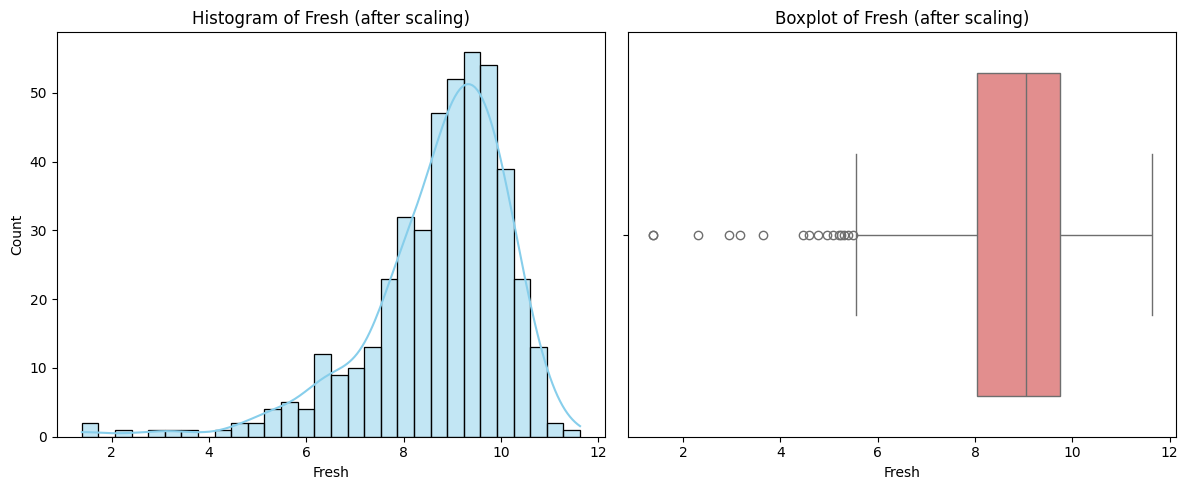

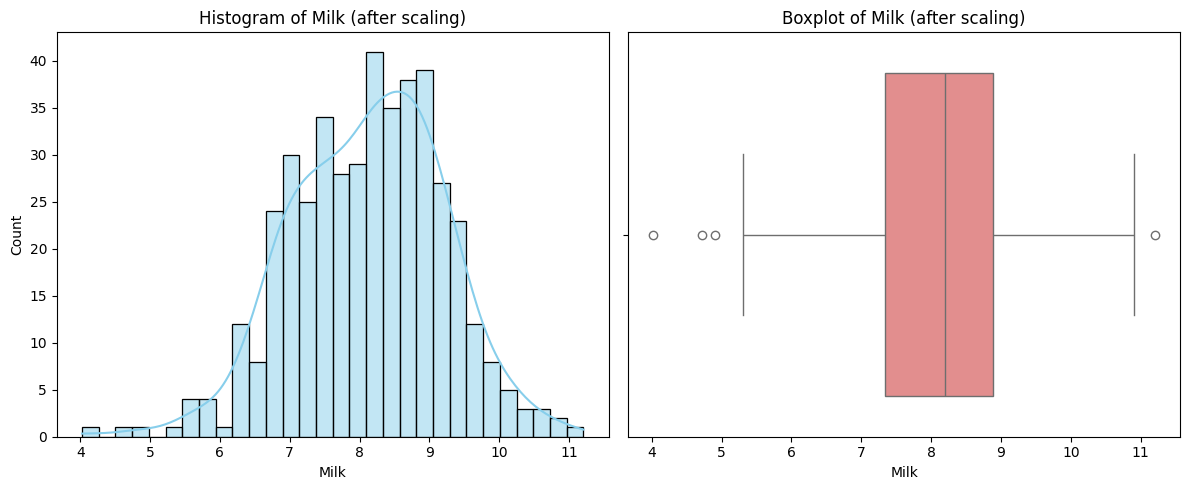

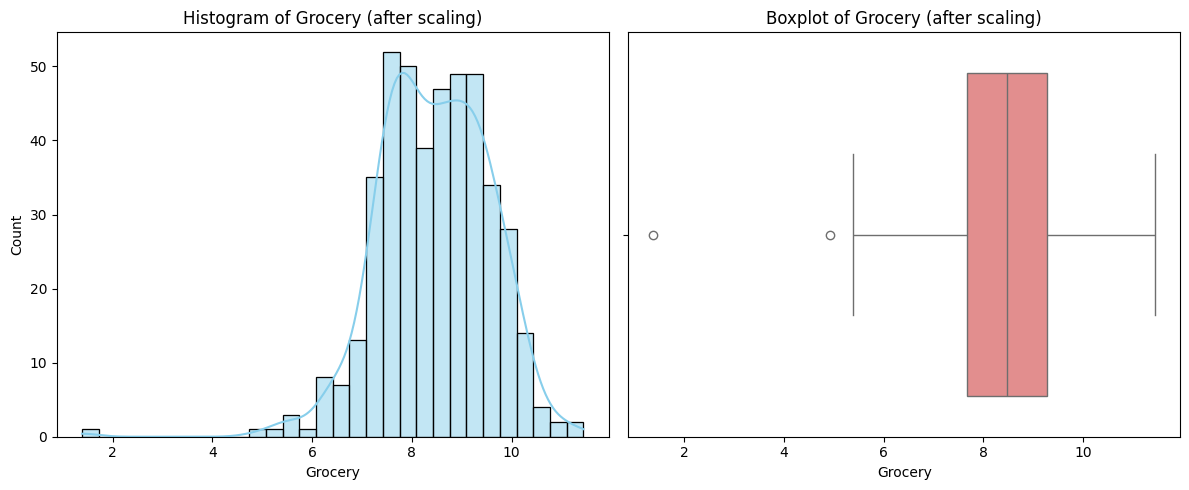

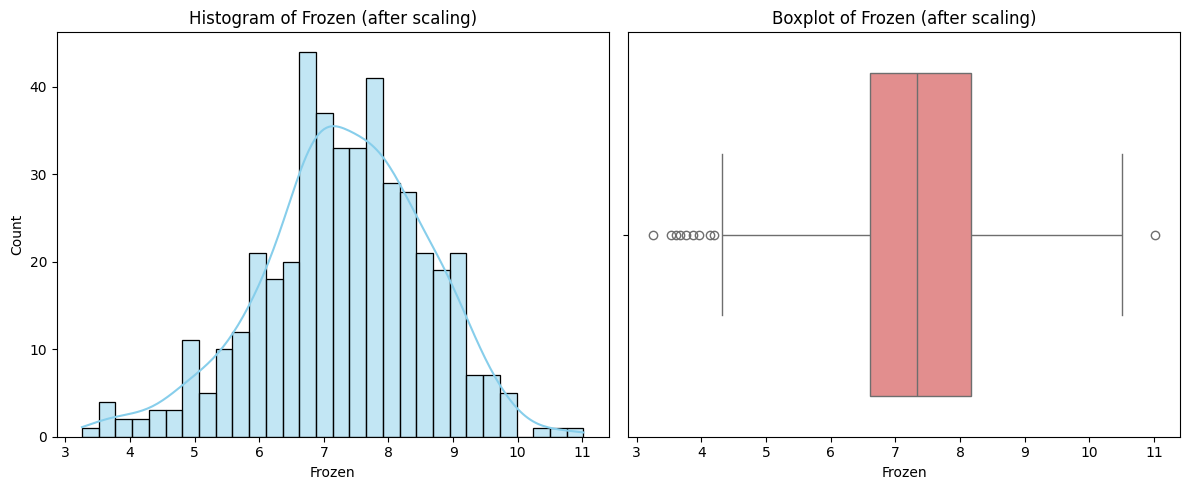

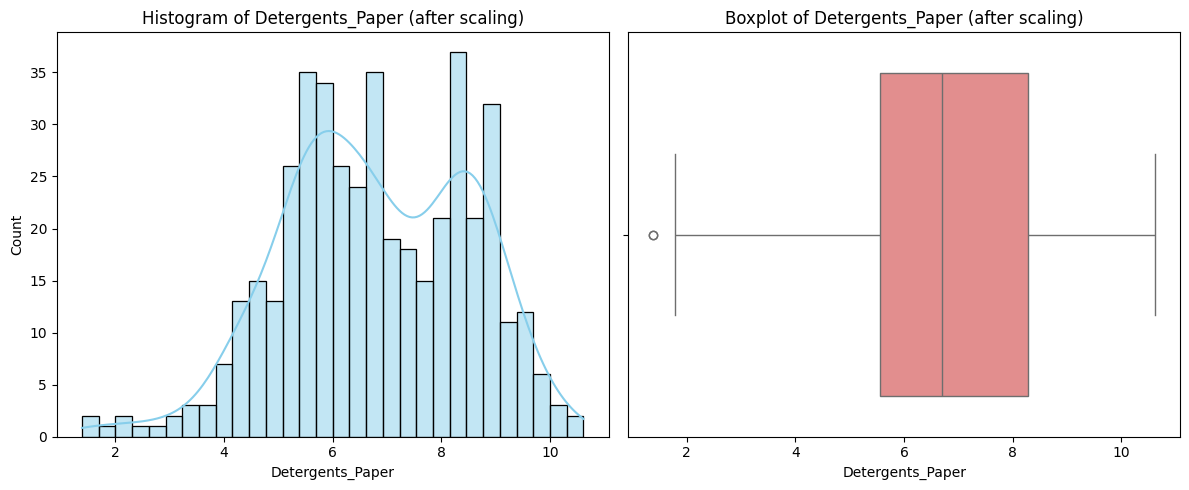

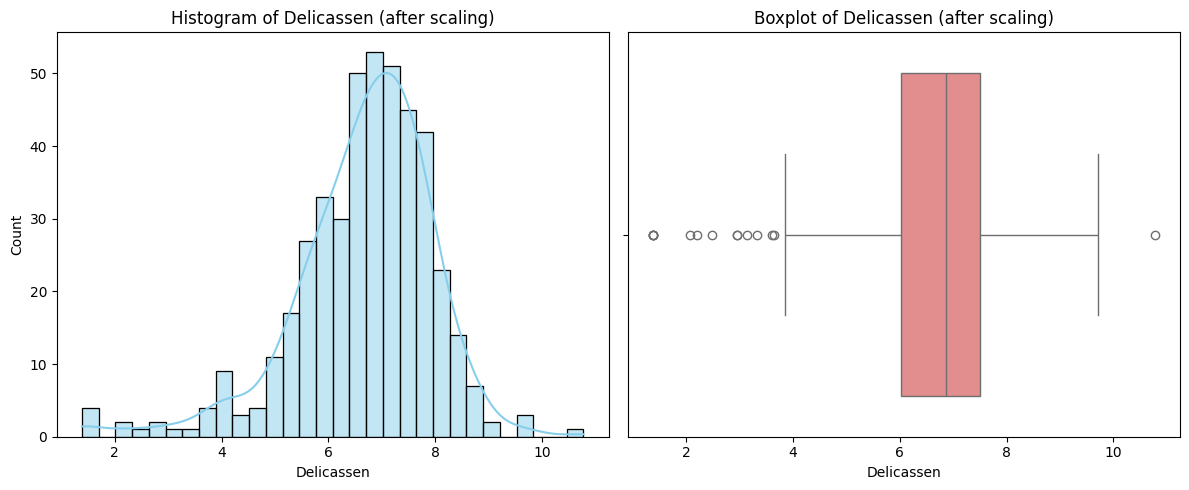

In [66]:
# To visually analyze the distribution of each feature
#  and check for the presence of outliers after scaling (using Histogram + Boxplot).

# Loop through each numerical column for visualization
for col in num_cols:
    plt.figure(figsize=(12,5))   # Set figure size for better visibility

    # ---------- Histogram with KDE ----------
    plt.subplot(1, 2, 1)   # Create first subplot (1 row, 2 cols, pos 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')  # Histogram with density curve
    plt.title(f'Histogram of {col} (after scaling)', fontsize=12)  # Title for histogram

    # ---------- Boxplot ----------
    plt.subplot(1, 2, 2)   # Create second subplot (1 row, 2 cols, pos 2)
    sns.boxplot(x=df[col], color='lightcoral')  # Boxplot to check outliers
    plt.title(f"Boxplot of {col} (after scaling)", fontsize=12)  # Title for boxplot

    # Adjust layout and display plots
    plt.tight_layout()  # Prevent overlap of subplots
    plt.show()  # Show plots for current column


**Insight:-**

The histograms and boxplots after scaling show that Fresh, Milk, Grocery, Detergents_Paper, and Delicassen generally follow near-normal distributions with varying spreads, though skewness and outliers are present. Fresh and Delicassen display noticeable left-side outliers, while Grocery and Milk show fewer extreme values, indicating more stable distributions. Detergents_Paper exhibits a bimodal trend, reflecting diverse purchasing behavior across customers. Overall, the presence of outliers highlights variability in customer spending, but the scaling has normalized ranges across features, making them comparable for clustering and further analysis.

## **5.2 Heatmap**

<Axes: >

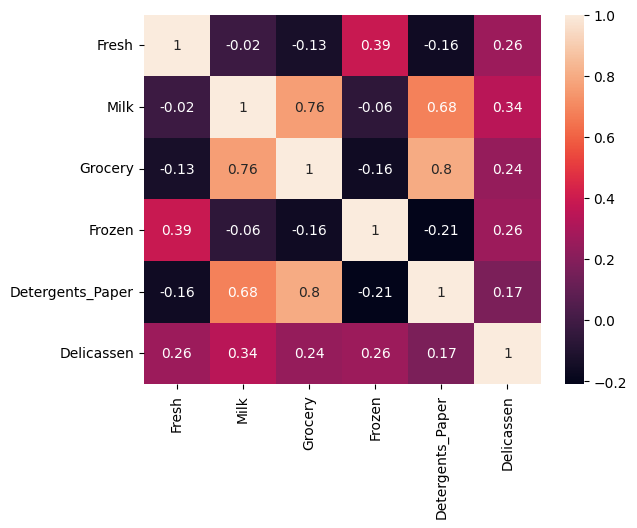

In [67]:
sns.heatmap(round(df.select_dtypes('number').corr(), 2), annot=True)

**Insight:-**

The correlation heatmap of the Wholesale Customer dataset reveals strong associations among Grocery, Milk, and Detergents_Paper, suggesting that these items often drive similar purchasing behaviors and may cluster together in unsupervised learning. In contrast, Fresh and Delicatessen categories show weaker or independent correlations, with Fresh moderately linked to Frozen. These patterns highlight that while some product categories align closely, others contribute unique variance, making them useful for distinguishing customer segments.

## **6. Scaling**

In [68]:
# Import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
sc = StandardScaler()

# Fit the scaler on the numerical columns and transform the data
feature_scaled = sc.fit_transform(df[num_cols])

# Display the first few rows of the scaled dataset
feature_scaled

array([[ 0.4861845 ,  0.97629884,  0.44015468, -1.50924981,  0.64414327,
         0.40896595],
       [ 0.08788863,  0.99095612,  0.65217085,  0.13405226,  0.76604314,
         0.62792606],
       [ 0.01635628,  0.89115098,  0.45468702,  0.37689926,  0.80440496,
         1.77683339],
       ...,
       [ 0.57952767,  1.41399051,  1.68865731, -0.95351417,  1.64761948,
         0.66656608],
       [ 0.34460869, -0.49078257, -0.65849797, -0.27890118, -0.97324089,
         0.76666284],
       [-0.54442663, -0.63351532, -0.55281539, -2.43158276, -0.36435895,
        -2.0896139 ]])

# **7. Dimenstionality Reduction**

In [69]:
# Import PCA class from sklearn.decomposition to perform Principal Component Analysis
from sklearn.decomposition import PCA

# Initialize PCA with three components to reduce dataset dimensionality to 3 principal components
pca = PCA(n_components=3)

# Fit PCA on the standardized dataset (feature_scaled)
pca.fit(feature_scaled)

PCA(n_components=3)

In [70]:
# Explained Variance Ratio
# Obtain the explained variance ratio for each of the three principal components
exp_var = pca.explained_variance_ratio_

# Display the proportion of variance explained by each component
exp_var

array([0.44077752, 0.27194917, 0.10698428])

In [71]:
# Cumilative explained variance
# Compute cumulative explained variance to measure total variance captured as components are added
cumulative_explained_variance = np.cumsum(exp_var)

# Display cumulative explained variance values
cumulative_explained_variance

array([0.44077752, 0.71272669, 0.81971097])

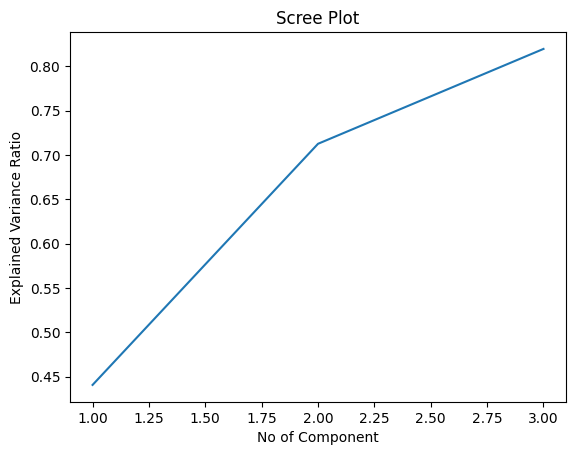

In [72]:
# Plot the scree plot to visualize how much variance is explained by each component cumulatively
plt.plot(range(1, len(cumulative_explained_variance)+1), cumulative_explained_variance)

# Label the x-axis as number of components
plt.xlabel('No of Component')

# Label the y-axis as explained variance ratio
plt.ylabel('Explained Variance Ratio')

# Add a title to the plot for better interpretation
plt.title('Scree Plot')

# Display the plot on the screen
plt.show()

**Insight:-**

The scree plot shows that the first two principal components capture the majority of the variance, with a steep rise in the explained variance ratio up to around 0.71. After the second component, the curve begins to flatten, indicating diminishing returns from adding more components. Hence, the optimal number of components is 2, as they provide a good balance between reducing dimensionality and retaining most of the dataset’s variability.

In [73]:
# Re-run PCA by specifying 2 components for visualization in two dimensions
pca = PCA(n_components=2)

# Transform the standardized dataset into two principal components
pca.fit_transform(feature_scaled)

array([[ 1.38038279e+00, -3.04726833e-01],
       [ 1.43886964e+00,  5.37468226e-01],
       [ 1.51345256e+00,  1.23256453e+00],
       [-8.25105399e-01,  1.21078962e+00],
       [ 8.02897108e-01,  1.76604596e+00],
       [ 8.86165465e-01,  1.29894179e-01],
       [ 6.03256020e-01, -4.61548124e-01],
       [ 1.15264871e+00,  6.07676153e-01],
       [ 5.30012066e-01, -6.30138062e-01],
       [ 2.19686557e+00,  3.26049510e-01],
       [ 1.43963779e+00,  5.54203107e-01],
       [-8.44476818e-01, -2.20841715e-02],
       [ 1.88285588e+00,  5.32338198e-01],
       [ 1.35028903e+00,  7.07840715e-01],
       [ 1.81571213e+00,  2.75000938e-01],
       [-6.30635468e-01, -8.08456441e-01],
       [ 1.94097238e+00, -1.65430313e+00],
       [ 1.38588659e-01,  5.40841151e-01],
       [ 1.19332956e+00,  1.22204216e+00],
       [ 5.46470299e-01, -5.44713456e-01],
       [ 5.69829905e-01,  6.69507283e-01],
       [-1.52192160e+00,  7.62767889e-02],
       [-1.65729348e-02,  2.08924555e+00],
       [ 2.

In [74]:
# Create a DataFrame with the two transformed principal components PC1 and PC2
pca_df = pd.DataFrame(pca.fit_transform(feature_scaled), columns=['PC1', 'PC2'])

# Display the newly created DataFrame containing the two principal components
pca_df

,PC1,PC2
0,1.380383,-0.304727
1,1.438870,0.537468
2,1.513453,1.232565
3,-0.825105,1.210790
4,0.802897,1.766046
...,...,...
435,0.592201,2.271130
436,-2.153224,1.697280
437,2.852577,0.194600
438,-1.011767,0.452785


<Axes: xlabel='PC1', ylabel='PC2'>

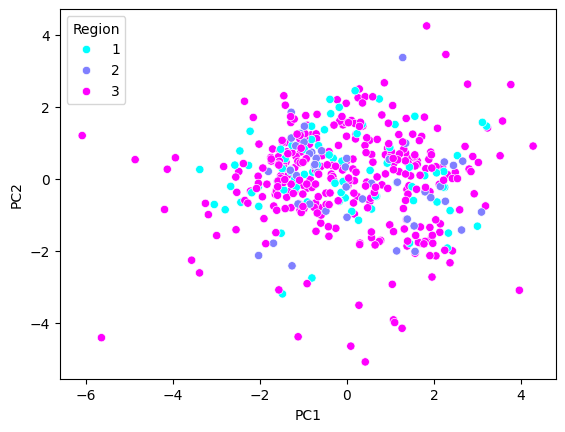

In [75]:
# Plot a scatterplot of the two principal components with Region used as the color grouping
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=meta['Region'], palette='cool')

**Insight:-**

The PCA scatter plot shows the distribution of customers across the first two principal components, with points colored according to different regions. The visualization reveals a significant overlap among the regions, suggesting that regional differences are not strongly separated in the reduced feature space. This indicates that while PCA helps in dimensionality reduction, the regional categories may not be the main drivers of variation in the dataset.

# **8. Clustering**

## **8.1 KMeans Clustering**

### **8.1.1. Deciding the Optimal Number of Clusters**

In [76]:
# Import KMeans class from sklearn.cluster for performing clustering
from sklearn.cluster import KMeans

# Initialize an empty list to store inertia values (sum of squared distances within clusters)
inertia = []

# Define a range of cluster numbers from 1 to 10 for testing different cluster sizes
k_values = range(1, 11)

# Iterate through each cluster size in the defined range
for i in k_values:
    # Initialize KMeans with 'i' clusters
    kmeans = KMeans(n_clusters=i)

    # Fit the KMeans model on the PCA-transformed dataset
    kmeans.fit(pca_df)

    # Append the calculated inertia value for the current number of clusters
    inertia.append(kmeans.inertia_)

    # Print the cluster number and corresponding inertia values
    print(i, 'Cluster', inertia)

1 Cluster [1881.598459865192]
2 Cluster [1881.598459865192, 1085.983426719909]
3 Cluster [1881.598459865192, 1085.983426719909, 874.0883507481124]
4 Cluster [1881.598459865192, 1085.983426719909, 874.0883507481124, 633.1825673578176]
5 Cluster [1881.598459865192, 1085.983426719909, 874.0883507481124, 633.1825673578176, 561.9772060160493]
6 Cluster [1881.598459865192, 1085.983426719909, 874.0883507481124, 633.1825673578176, 561.9772060160493, 445.8762171025271]
7 Cluster [1881.598459865192, 1085.983426719909, 874.0883507481124, 633.1825673578176, 561.9772060160493, 445.8762171025271, 380.52249762879575]
8 Cluster [1881.598459865192, 1085.983426719909, 874.0883507481124, 633.1825673578176, 561.9772060160493, 445.8762171025271, 380.52249762879575, 344.49270386704757]
9 Cluster [1881.598459865192, 1085.983426719909, 874.0883507481124, 633.1825673578176, 561.9772060160493, 445.8762171025271, 380.52249762879575, 344.49270386704757, 322.6882366700718]
10 Cluster [1881.598459865192, 1085.98342

### **8.1.2 Elbow Method Visualization**

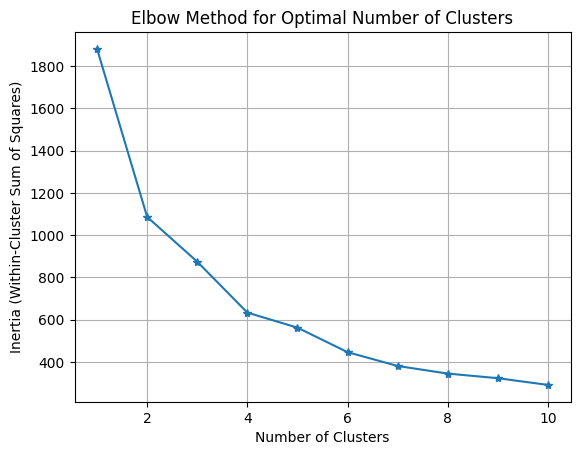

In [77]:
import matplotlib.pyplot as plt
# Plot number of clusters vs inertia values
plt.plot(k_values, inertia, marker="*")
plt.xlabel('Number of Clusters')                        # Label x-axis
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')   # Label y-axis
plt.title('Elbow Method for Optimal Number of Clusters')# Add title
plt.grid(True)                                          # Display grid
plt.show()

**Insight:-**

The Elbow Method plot indicates a sharp decline in inertia from 1 to 3 clusters, after which the rate of decrease slows down. This clear bend at 3 clusters suggests that the optimal number of clusters for the dataset is three, as adding more clusters beyond this point yields diminishing improvements in explaining variance.

**Optimal no of clusters - 3**

### **8.1.3 Silhouette Score for Cluster Quality**

In [78]:
from sklearn.metrics import silhouette_score

# Initialize KMeans with 3 clusters (chosen from elbow curve)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit and predict cluster labels
labels = kmeans.fit_predict(pca_df)

# Calculate silhouette score to evaluate clustering quality
score = silhouette_score(pca_df, labels)

# Print the silhouette score (closer to 1 = better separation)
print('Silhouette Score:', score)

Silhouette Score: 0.3277892117673151


**Insight:-**

The silhouette score of 0.328 indicates a moderate quality of clustering. While the value is above zero, suggesting that the clusters are somewhat distinct, the relatively low score highlights that there is overlap between groups, and the separation is not very strong. This implies that while three clusters provide a workable solution, the dataset’s natural boundaries between customer groups are not very well defined.

### **8.1.4 Fit KMeans & Assign Clusters**

In [79]:
# Final KMeans model with 3 clusters
kmenas = KMeans(n_clusters=3, random_state=42)

# Assign predicted cluster labels to PCA DataFrame
pca_df['Clusters'] = kmenas.fit_predict(pca_df)

In [80]:
# Display the DataFrame with assigned clusters
pca_df

,PC1,PC2,Clusters
0,1.380383,-0.304727,0
1,1.438870,0.537468,0
2,1.513453,1.232565,2
3,-0.825105,1.210790,2
4,0.802897,1.766046,2
...,...,...,...
435,0.592201,2.271130,2
436,-2.153224,1.697280,1
437,2.852577,0.194600,0
438,-1.011767,0.452785,1


In [81]:
# Count how many samples belong to each cluster
pca_df['Clusters'].value_counts()

,count
Clusters,
1,167
0,143
2,130


### **8.1.5 Cluster Profiling**

In [82]:
# Copy original dataset for cluster profiling
df_clustered = df.copy()

# Add cluster labels as a new column
df_clustered['Clusters'] = pca_df['Clusters'].values

# Calculate average feature values per cluster
cluster_summary = df_clustered.groupby('Clusters').mean()

# Print summary to interpret characteristics of each cluster
print(cluster_summary)

             Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
Clusters                                                                      
0         7.869547  8.987506  9.464406  6.505699          8.509003    6.561651
1         8.790011  7.170435  7.462901  7.296495          5.353758    6.067095
2         9.608929  8.391036  8.575813  8.188820          6.750144    7.567389


# **Customer Segmentation:**

* **Cluster 0:** Customers in this group show higher spending on Grocery, Milk, and Detergents_Paper. This reflects balanced buyers who focus on everyday essentials, indicating a steady demand for staple household products.

* **Cluster 1:** This cluster records relatively higher spending on Fresh products, but noticeably lower on Grocery and Detergents_Paper. Such a pattern suggests these customers prefer perishable items, possibly restaurants or buyers with a focus on fresh supplies.

* **Cluster 2:** Customers in this cluster demonstrate the highest averages across Fresh, Frozen, and Delicatessen categories. This indicates broader and more premium purchasing behavior, representing high-value customers with diverse product requirements.

**Overall, these clusters reveal distinct purchasing behaviors that can guide businesses in designing tailored marketing and promotional strategies for each segment.**

### **8.1.6 Visualization of Clusters in PCA Space**

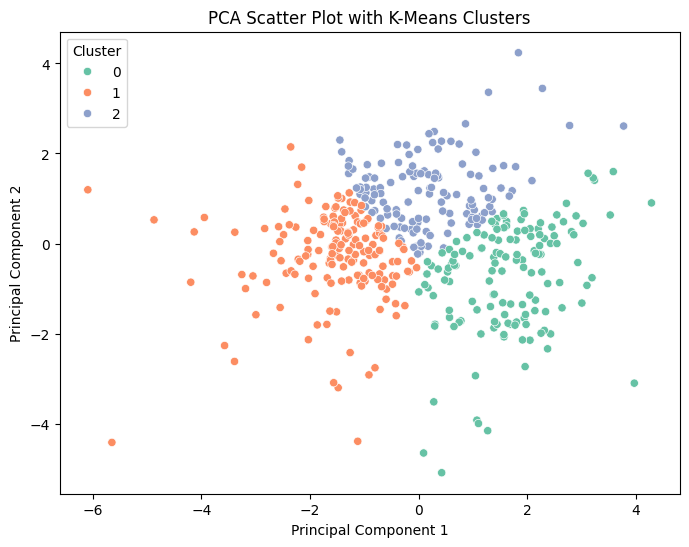

In [83]:
# Create a figure object and set the size of the plot to 8 (width) by 6 (height)
plt.figure(figsize=(8,6))

# Generate a scatter plot using Seaborn
# X-axis → PC1, Y-axis → PC2, points are colored based on their cluster assignment
# The palette 'Set2' is used for distinct cluster colors
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Clusters',
    data=pca_df,
    palette='Set2',
)

# Add a descriptive title to the scatter plot
plt.title('PCA Scatter Plot with K-Means Clusters')

# Label the x-axis as Principal Component 1
plt.xlabel('Principal Component 1')

# Label the y-axis as Principal Component 2
plt.ylabel('Principal Component 2')

# Add a legend to identify clusters by color
plt.legend(title='Cluster')

# Display the final scatter plot
plt.show()

**Insight:-**

The PCA scatter plot illustrates the distribution of customers into three distinct clusters based on their purchasing patterns. While some overlap exists, the clusters are relatively well-separated, indicating that K-Means effectively captures underlying group structures. Cluster 0 and Cluster 1 show clearer boundaries, whereas Cluster 2 overlaps slightly with both, reflecting moderate similarity in customer behavior. Overall, the visualization confirms that three clusters provide a meaningful segmentation of the wholesale customers.

## 8.2 DBSCAN


### **8.2.1 k-Distance Graph (Choosing eps parameter)**

In [84]:
# Import NearestNeighbors to calculate distances to nearest neighbors
from sklearn.neighbors import NearestNeighbors

# Define minimum number of samples required to form a dense region
min_samples = 5

# Initialize NearestNeighbors model with the same min_samples value
neighbors = NearestNeighbors(n_neighbors=min_samples)

# Fit the model on PCA-reduced dataset
neighbors_fit = neighbors.fit(pca_df)

# Compute distances to nearest neighbors and their indices
distances, indices = neighbors_fit.kneighbors(pca_df)

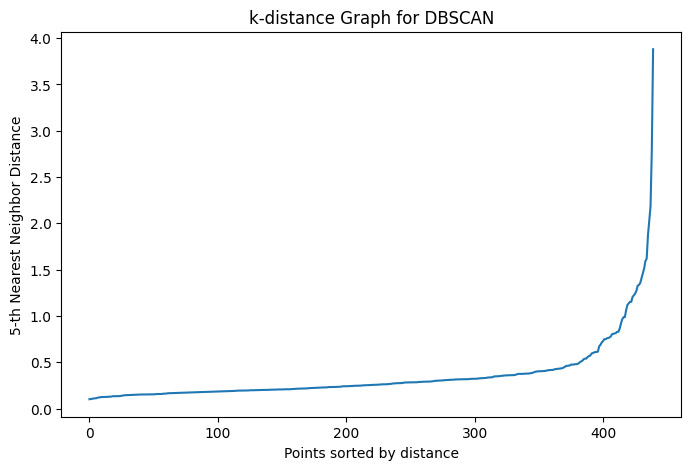

In [85]:
# Sort the k-th nearest neighbor distances in ascending order
k_distances = np.sort(distances[:, min_samples-1])

# Create a figure of size 8x5 for plotting the k-distance graph
plt.figure(figsize=(8,5))

# Plot the sorted k-distances to identify the "elbow" point
plt.plot(k_distances)

# Label x-axis as points sorted by distance
plt.xlabel('Points sorted by distance')

# Label y-axis as k-th nearest neighbor distance
plt.ylabel(f'{min_samples}-th Nearest Neighbor Distance')

# Add a title for the k-distance graph
plt.title('k-distance Graph for DBSCAN')

# Display the k-distance plot
plt.show()

**Insight:-**
The k-distance graph shows a gradual slope at the beginning, followed by a sharp rise around the distance value of approximately 0.8. This elbow point suggests an appropriate choice of the epsilon (ε) parameter for DBSCAN. Selecting ε near this threshold balances cluster formation by distinguishing dense regions from noise, ensuring meaningful clusters while avoiding excessive fragmentation or merging.

**Optimal eps value is 0.8**

### **8.2.2 Apply DBSCAN Clustering**

In [86]:
# Import DBSCAN clustering algorithm
from sklearn.cluster import DBSCAN

# Initialize DBSCAN with eps=0.8 and min_samples=5 (parameters decided from k-distance graph)
dbscan = DBSCAN(eps=0.8, min_samples=5)

# Fit DBSCAN on PCA dataset and predict cluster labels
labels = dbscan.fit_predict(pca_df)

### **8.2.3 Add Cluster Labels to DataFrame**

In [87]:
# Convert PCA DataFrame into a new DataFrame for clustering results
df = pd.DataFrame(pca_df)

# Add a new column called 'cluster' to store DBSCAN cluster labels
df['cluster'] = labels

# Print the number of points in each cluster (including noise = -1)
print(df['cluster'].value_counts())

cluster
 2    157
 0    134
 1    125
-1     24
Name: count, dtype: int64


### **8.2.4 Visualize DBSCAN Clusters**

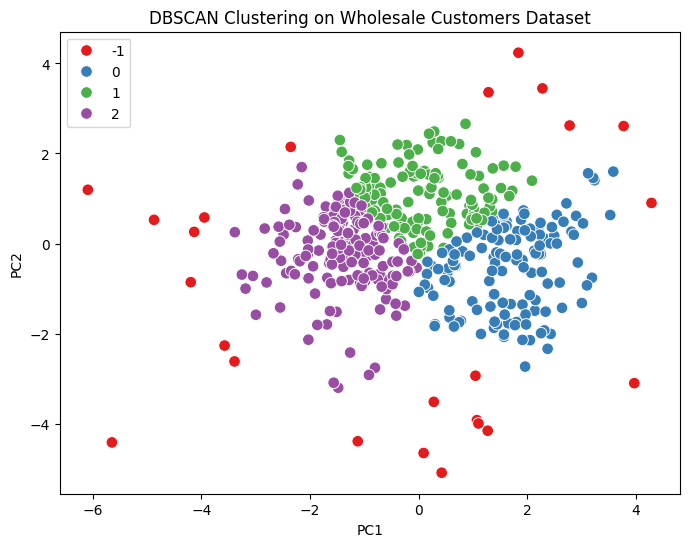

In [88]:
# Create a figure of size 8x6 for plotting clusters
plt.figure(figsize=(8,6))

# Scatter plot of clusters using PC1 and PC2, colored by cluster labels
sns.scatterplot(x='PC1', y='PC2', data=df, hue=labels, palette='Set1', s=70)

# Add title to the plot
plt.title("DBSCAN Clustering on Wholesale Customers Dataset")

# Display the plot
plt.show()

**Insight:-**

The DBSCAN clustering output divides the customers into three main clusters while also identifying several points as outliers (labeled as -1 in red). Cluster 0, Cluster 1, and Cluster 2 are relatively compact and well-separated, showing that DBSCAN effectively captures dense groupings within the data. The presence of outliers indicates customers with highly distinct purchasing behavior who do not fit into the main clusters. This result highlights DBSCAN’s strength in detecting both core groups and noise, making it useful for identifying atypical customer profiles alongside dominant purchasing patterns.

## **8.3 Hierarchical Clustering**

### **8.3.1 Import Required Functions**

In [89]:
# Import dendrogram (for visualization) and linkage (to compute hierarchical clusters)
from scipy.cluster.hierarchy import dendrogram, linkage


### **8.3.2 Perform Hierarchical Clustering**

In [90]:
# Apply hierarchical clustering on PCA-reduced dataset
# 'ward' method minimizes the variance within clusters when merging
Z = linkage(pca_df, method='ward')

### **8.3.3 Plot Dendrogram**

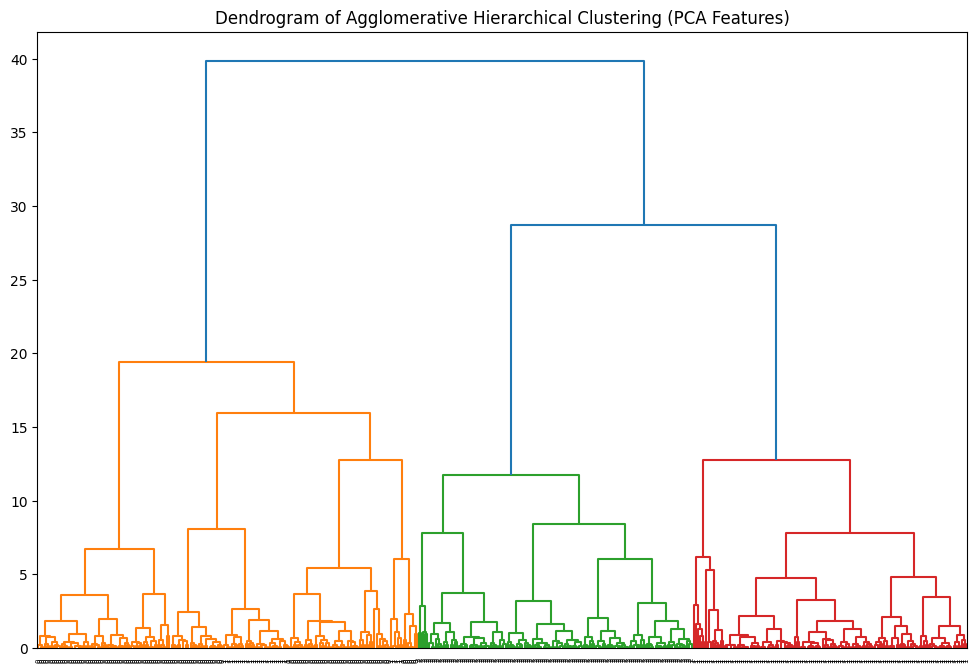

In [91]:
# Create a figure for dendrogram visualization (size 12x8 for clarity)
plt.figure(figsize=(12, 8))

# Plot dendrogram using linkage matrix Z
# Use existing KMeans cluster labels for leaves (optional for interpretation)
dendrogram(Z, labels=pca_df['Clusters'].tolist(), leaf_rotation=90)

# Add title for the dendrogram
plt.title('Dendrogram of Agglomerative Hierarchical Clustering (PCA Features)')

# Display dendrogram plot
plt.show()

**Insight:-**

The dendrogram illustrates the hierarchical relationships among wholesale customers based on PCA features. The structure shows three major groupings, as indicated by the clear separation when cutting the tree at an appropriate height. Within each large branch, smaller sub-clusters emerge, reflecting nuanced differences in purchasing behavior. This confirms that hierarchical clustering not only identifies broad customer segments but also uncovers layered subgroup structures, making it useful for multi-level customer segmentation.

# **Conclusion**
The clustering analysis on the wholesale customers dataset revealed distinct purchasing patterns that can guide targeted business strategies. KMeans identified three meaningful segments with varying preferences across fresh, grocery, and premium product categories, while DBSCAN further highlighted dense core clusters and outliers, ensuring robustness against noise. Hierarchical clustering confirmed the natural grouping tendency of customers, with three major clusters and additional sub-structures for deeper insights. Overall, clustering has proven effective in segmenting customers into interpretable groups, enabling data-driven marketing, inventory planning, and customer relationship management.